Here I want to look into the 'flattening' of my planes of satellites. Specifically, I'll consider the inertia tensor.

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
kpc = 3.0857e+19

Load data

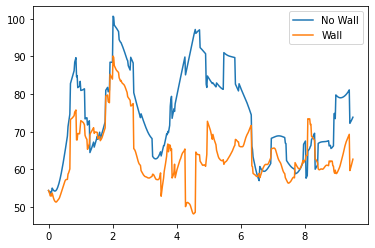

In [18]:
data = np.load("../satellites/nowall.npz")
x0 = data['x']
t0 = data['t']
r0 = np.linalg.norm(x0, axis=-1)

data = np.load("../satellites/wall.npz")
x1 = data['x']
t1 = data['t']
r1 = np.linalg.norm(x0, axis=-1)


assert (t0 == t1).all()
t = t0
N_snaps = len(t)

r_max = 200
rms0 = np.zeros((N_snaps))
rms1 = np.zeros((N_snaps))
for i in range(N_snaps):

    inds = r0[i] < r_max
    z = x0[i, inds, 2]
    rms0[i] = np.sqrt(np.mean(z**2))
    
    inds = r1[i] < r_max
    z = x1[i, inds, 2]
    rms1[i] = np.sqrt(np.mean(z**2))
    

plt.plot(t, rms0, label='No Wall');
plt.plot(t, rms1, label='Wall');
plt.legend()


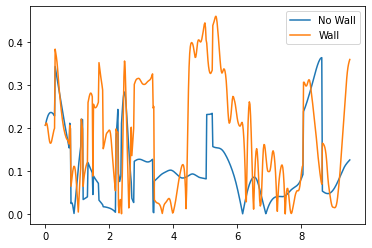

In [3]:
data = np.load("../satellites/nowall.npz")
x0 = data['x']
t0 = data['t']
r0 = np.linalg.norm(x0, axis=-1)

data = np.load("../satellites/wall.npz")
x1 = data['x']
t1 = data['t']
r1 = np.linalg.norm(x0, axis=-1)


assert (t0 == t1).all()
t = t0
N_snaps = len(t)

r_max = 400
f0 = np.zeros((N_snaps))
f1 = np.zeros((N_snaps))
for i in range(N_snaps):
    
    inds = r0[i] < r_max
    N = inds.sum()
    x = x0[i, inds]
    r = np.linalg.norm(x, axis=-1)
    I = np.zeros((3, 3))
    for j in range(N):
        I += x[j]**2 * np.eye(3) - np.outer(x[j], x[j])
    e = np.abs(np.linalg.eigvals(I))
    f0[i] = e.min() / e.max()
    
    inds = r1[i] < r_max
    N = inds.sum()
    x = x1[i, inds]
    r = np.linalg.norm(x, axis=-1)
    I = np.zeros((3, 3))
    for j in range(N):
        I += x[j]**2 * np.eye(3) - np.outer(x[j], x[j])
    e = np.abs(np.linalg.eigvals(I))
    f1[i] = e.min() / e.max()

plt.plot(t, f0, label='No Wall');
plt.plot(t, f1, label='Wall');
plt.legend()

In [4]:
np.linalg.eig(I)

(array([-89126.26302971,  57084.29699245,  32041.96603726]),
 array([[-0.62022745,  0.76274906,  0.18311686],
        [ 0.58305139,  0.6044362 , -0.54287011],
        [ 0.52475612,  0.2299364 ,  0.81960982]]))

In [5]:
help(np.linalg.eig)

Help on function eig in module numpy.linalg:

eig(a)
    Compute the eigenvalues and right eigenvectors of a square array.
    
    Parameters
    ----------
    a : (..., M, M) array
        Matrices for which the eigenvalues and right eigenvectors will
        be computed
    
    Returns
    -------
    w : (..., M) array
        The eigenvalues, each repeated according to its multiplicity.
        The eigenvalues are not necessarily ordered. The resulting
        array will be of complex type, unless the imaginary part is
        zero in which case it will be cast to a real type. When `a`
        is real the resulting eigenvalues will be real (0 imaginary
        part) or occur in conjugate pairs
    
    v : (..., M, M) array
        The normalized (unit "length") eigenvectors, such that the
        column ``v[:,i]`` is the eigenvector corresponding to the
        eigenvalue ``w[i]``.
    
    Raises
    ------
    LinAlgError
        If the eigenvalue computation does not converg

In [6]:
np.outer(x[0], x[0])

array([[ 9893.56328783,  5484.18026279, -2409.2502239 ],
       [ 5484.18026279,  3039.97986163, -1335.49077735],
       [-2409.2502239 , -1335.49077735,   586.69323402]])

In [7]:
x0 = np.random.uniform(low=-100, high=100, size=1000)
x1 = np.random.uniform(low=-100, high=100, size=1000)
x2 = np.random.uniform(low=-10, high=10, size=1000)
x = np.stack((x0, x1, x2), axis=-1)
r = np.linalg.norm(x, axis=-1)
I1 = np.zeros((3, 3))
I2 = np.zeros((3, 3))
for j in range(50):
    I1 += x[j]**2 * np.eye(3) - np.outer(x[j], x[j])
    I2 += np.outer(x[j], x[j])

In [8]:
np.linalg.eig(I1)

(array([-1.24066177e+04,  1.23968589e+04,  9.75887516e+00]),
 array([[-0.70695156, -0.70722974, -0.00675188],
        [-0.70577954,  0.70605541, -0.05797419],
        [-0.04576827,  0.03621961,  0.99829525]]))

In [9]:
np.linalg.eig(I2)

(array([164688.15243566, 138646.02661995,   1887.18222652]),
 array([[ 5.87485275e-01,  8.09219895e-01, -4.92066544e-03],
        [ 8.09229243e-01, -5.87492986e-01, -1.52002848e-04],
        [ 3.01386016e-03,  3.89264693e-03,  9.99987882e-01]]))

In [10]:
x[j]**2

array([ 120.50768492, 5411.49094331,   85.43449939])

In [15]:
data = np.load("../satellites/nowall.npz")
x = data['x'][0]

I = np.zeros((3, 3))
for j in range(50):
    I += x[j]**2 * np.eye(3) - np.outer(x[j], x[j])

In [17]:
np.linalg.eig(I)

(array([-175700.46756768,   36277.92804282,  139422.53952486]),
 array([[-0.42915511, -0.88827824, -0.16366937],
        [-0.65690693,  0.18258457,  0.73153002],
        [ 0.61991869, -0.42145539,  0.66187323]]))